In [1]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import shutil
import soundfile as sf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix

In [2]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Caminho para os dados no Google Drive
file_path_real = '/content/drive/MyDrive/audios_FOR/amostra_FOR/real'
file_path_fake = '/content/drive/MyDrive/audios_FOR/amostra_FOR/fake'

In [4]:
# Listar os arquivos e subpastas
print(os.listdir(file_path_real))
print(os.listdir(file_path_fake))

['file100.wav', 'file10.wav', 'file1.wav', 'file101.wav', 'file109.wav', 'file11.wav', 'file111.wav', 'file114.wav', 'file12.wav', 'file13.wav', 'file14.wav', 'file15.wav', 'file16.wav', 'file17.wav', 'file18.wav', 'file19.wav', 'file200.wav', 'file2.wav', 'file20.wav', 'file204.wav', 'file202.wav', 'file21.wav', 'file213.wav', 'file22.wav', 'file2233.wav', 'file2243.wav', 'file2247.wav', 'file2241.wav', 'file2237.wav', 'file2234.wav', 'file2230.wav', 'file2235.wav', 'file2249.wav', 'file2242.wav', 'file2227.wav', 'file2228.wav', 'file2238.wav', 'file2229.wav', 'file2239.wav', 'file2232.wav', 'file2246.wav', 'file2240.wav', 'file2245.wav', 'file2231.wav', 'file2248.wav', 'file2244.wav', 'file2236.wav', 'file2260.wav', 'file2261.wav', 'file2259.wav', 'file2263.wav', 'file2252.wav', 'file2258.wav', 'file23.wav', 'file2264.wav', 'file2254.wav', 'file24.wav', 'file2262.wav', 'file2256.wav', 'file2257.wav', 'file2253.wav', 'file2250.wav', 'file2255.wav', 'file2251.wav', 'file27.wav', 'file2

In [5]:
# Função para processar os áudios em uma pasta
def process_audio_files(folder_path):

    for audio_file in os.listdir(folder_path):
        audio_path = os.path.join(folder_path, audio_file)

        # Carregar o áudio
        y, sr = librosa.load(audio_path, sr=None)

        # Mostrar informações do áudio
        print(f"Arquivo: {audio_file}, Duração: {len(y) / sr:.2f}s, Taxa de amostragem: {sr}Hz")

        # Plotar waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Waveform de {audio_file}")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Amplitude")
        plt.show()

In [6]:
# Processar áudios Real
#process_audio_files(file_path_real)

In [7]:
# Processar áudios Fake
#process_audio_files(file_path_fake)

In [8]:
# Função para extrair MFCCs de um arquivo
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)  # Média dos coeficientes

# Carregar dados e rótulos
data = []
labels = []

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(0)  # Rótulo 0 para Fake

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(1)  # Rótulo 1 para Real

In [9]:
# Converter para DataFrame
df = pd.DataFrame(data)
df['label'] = labels

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
1,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
2,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
3,-260.772095,100.655792,-12.220487,17.379456,3.107814,3.070307,-14.434928,-16.615852,-1.516885,-10.268405,-3.625272,-15.584664,6.638715,0
4,-274.639465,116.786484,-6.033847,4.132980,-17.080019,1.314287,-4.690825,-6.864094,-5.670807,-11.633682,4.117467,-16.529873,4.006462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,-382.654144,79.083229,-24.000839,32.490871,-11.816445,-5.652604,-4.385693,-9.392941,-2.780435,-3.954512,-11.016452,-0.057047,-6.691374,1
798,-287.422302,112.384613,-8.051580,43.121960,1.259456,-4.831054,7.262227,-6.952175,-1.750905,-0.312316,-1.797363,1.583535,-5.326721,1
799,-308.821716,57.043686,3.870187,30.615040,-13.108034,-13.102796,-21.079472,-21.996910,-15.296227,-3.665011,-15.141479,1.185465,-17.169489,1
800,-301.363037,177.069092,-37.498245,5.008915,8.963133,-2.310470,-10.783433,-15.959943,-5.289495,-14.481618,-3.625240,-2.413878,-10.062649,1


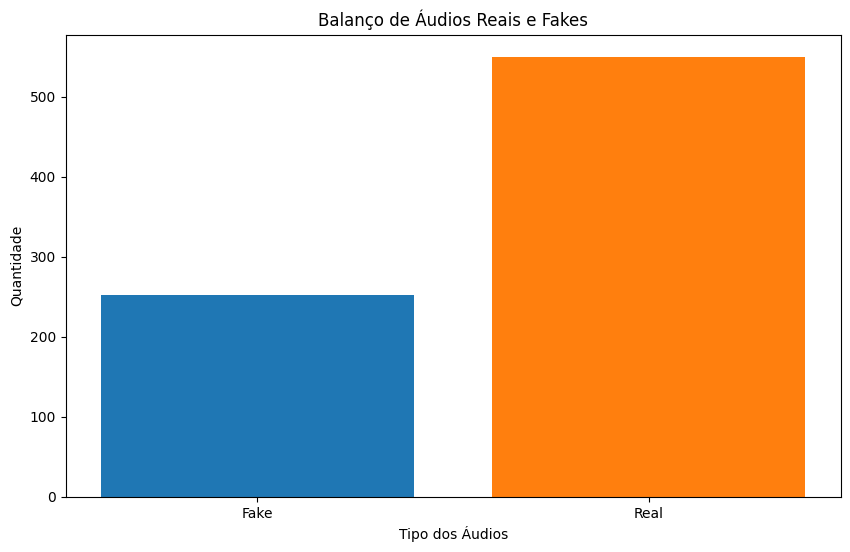

In [11]:
# Contar as ocorrências de cada label
label_counts = [labels.count(0), labels.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [12]:
# Separar características (X) e rótulos (y)
X = df.drop(columns=['label'])
y = df['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [14]:
# Calculando métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Absoluto Médio (MAE): 0.07
Coeficiente de Determinação (R²): 0.68


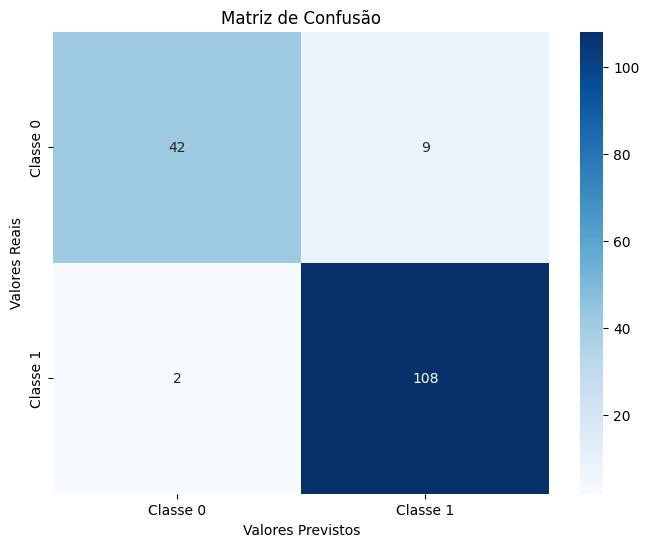

In [15]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [16]:
def add_noise(y, noise_factor=0.005):
    noise = np.random.randn(len(y))
    y_noise = y + noise_factor * noise
    return y_noise

In [17]:
# Caminho para os dados no Google Drive
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_ruido'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com ruído
data_noise = []  # Dados com ruído
labels_noise = []  # Rótulos com ruído

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features)
    labels_noise.append(0)  # Rótulo "fake"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features_noise)
    labels_noise.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'fake' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path, 'fake', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features)
    labels_noise.append(1)  # Rótulo "real"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise.append(features_noise)
    labels_noise.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'real' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path, 'real', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído

In [18]:
# Converter para DataFrame
df_noise = pd.DataFrame(data_noise)
df_noise['label'] = labels_noise

In [19]:
df_noise

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
1,-209.769057,58.252458,-5.888079,6.145713,1.394453,-7.783797,-15.103605,-10.690343,-4.759653,-7.279457,-7.698224,-7.595060,-2.754323,0
2,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
3,-226.523859,50.791940,17.945655,16.052730,7.826940,-1.618617,0.484319,2.410515,-8.969266,-10.463753,-9.556781,-7.815300,-7.639822,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,-225.083481,28.334545,6.447537,12.688769,-5.553919,-10.360272,-17.938192,-14.858143,-12.360730,-5.905440,-6.239397,-3.191719,-9.678312,1
1600,-301.363037,177.069092,-37.498245,5.008915,8.963133,-2.310470,-10.783433,-15.959943,-5.289495,-14.481618,-3.625240,-2.413878,-10.062649,1
1601,-225.281690,96.460567,1.488273,-4.358647,7.284703,-1.034518,-11.404786,-12.658409,-9.024944,-9.519594,-5.672993,-3.693011,-6.444262,1
1602,-306.485382,68.190407,-10.158875,4.076507,-24.319769,-18.536684,-18.648014,-23.582424,-21.241289,-1.093893,-14.486947,-7.540875,-19.299929,1


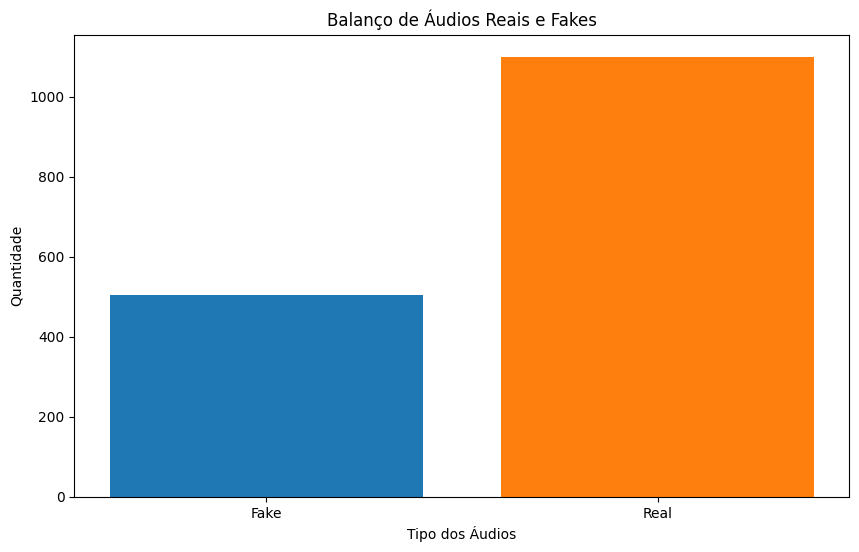

In [20]:
# Contar as ocorrências de cada label
label_counts = [labels_noise.count(0), labels_noise.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [21]:
# Separar características (X) e rótulos (y)
X = df_noise.drop(columns=['label'])
y = df_noise['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [23]:
# Calculando métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Absoluto Médio (MAE): 0.16
Coeficiente de Determinação (R²): 0.30


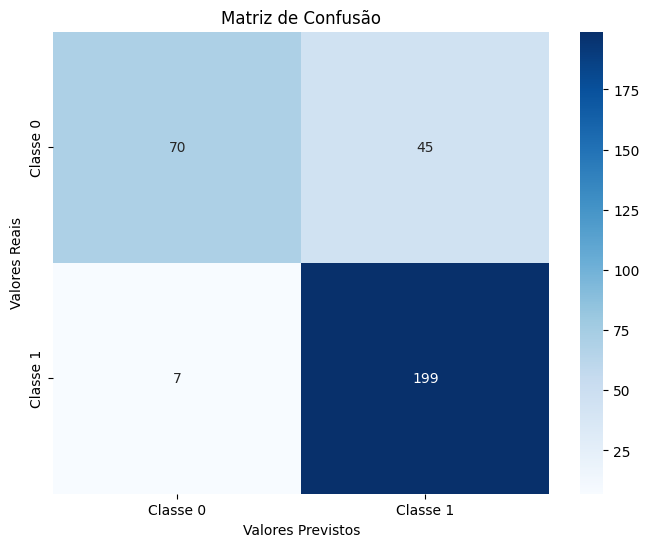

In [24]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [25]:
output_path_balanced = '/content/drive/MyDrive/audios_FOR/amostra_FOR_ruido_balanced'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path_balanced, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path_balanced, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com ruído
data_noise_balanced = []  # Dados com ruído
labels_noise_balanced = []  # Rótulos com ruído

# Função para balancear os dados usando replicação simples
def balance_data(real_files, fake_files):
    """Balanceia os dados replicando aleatoriamente as amostras da classe minoritária."""
    len_real = len(real_files)
    len_fake = len(fake_files)

    # Verificar qual classe tem menos amostras
    if len_real > len_fake:
        # Replicar os arquivos 'fake' até igualar o número
        fake_files += random.choices(fake_files, k=len_real - len_fake)
    elif len_fake > len_real:
        # Replicar os arquivos 'real' até igualar o número
        real_files += random.choices(real_files, k=len_fake - len_real)

    return real_files, fake_files

# Obter listas de arquivos reais e fakes
real_files = os.listdir(file_path_real)
fake_files = os.listdir(file_path_fake)

# Balancear os arquivos
real_files, fake_files = balance_data(real_files, fake_files)

# Processar Fake
for file_name in fake_files:
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features)
    labels_noise_balanced.append(0)  # Rótulo "fake"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features_noise)
    labels_noise_balanced.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'fake' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path_balanced, 'fake', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído balanceado

# Processar Real
for file_name in real_files:
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features)
    labels_noise_balanced.append(1)  # Rótulo "real"

    # Adicionando ruído
    y_noise = add_noise(y)  # Adicionando ruído
    features_noise = np.mean(librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=13).T, axis=0)
    data_noise_balanced.append(features_noise)
    labels_noise_balanced.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com ruído na pasta 'real' (com sufixo "_ruido")
    output_file_path_ruido = os.path.join(output_path_balanced, 'real', file_name.replace('.wav', '_ruido.wav'))
    sf.write(output_file_path_ruido, y_noise, sr)  # Salvando a versão com ruído balanceado

In [26]:
# Converter para DataFrame
df_noise_balanced = pd.DataFrame(data_noise_balanced)
df_noise_balanced['label'] = labels_noise_balanced

In [27]:
df_noise_balanced

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
1,-209.172056,57.755552,-5.628982,5.479875,0.429857,-7.629191,-14.451482,-10.972809,-5.348762,-7.141836,-7.747012,-8.025433,-3.455437,0
2,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
3,-226.568199,51.128113,18.117951,15.561817,7.450267,-2.012236,0.016559,2.718920,-9.014968,-9.773615,-9.542839,-8.148472,-7.532058,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,-226.074841,27.959861,6.327690,13.669482,-5.116411,-9.481959,-16.855438,-14.702959,-12.637266,-5.965109,-6.059648,-2.916413,-9.403615,1
2196,-301.363037,177.069092,-37.498245,5.008915,8.963133,-2.310470,-10.783433,-15.959943,-5.289495,-14.481618,-3.625240,-2.413878,-10.062649,1
2197,-225.403357,96.093795,1.431512,-4.370039,7.259357,-0.826862,-11.477555,-12.733595,-9.005816,-9.671723,-5.773443,-3.774219,-6.807081,1
2198,-306.485382,68.190407,-10.158875,4.076507,-24.319769,-18.536684,-18.648014,-23.582424,-21.241289,-1.093893,-14.486947,-7.540875,-19.299929,1


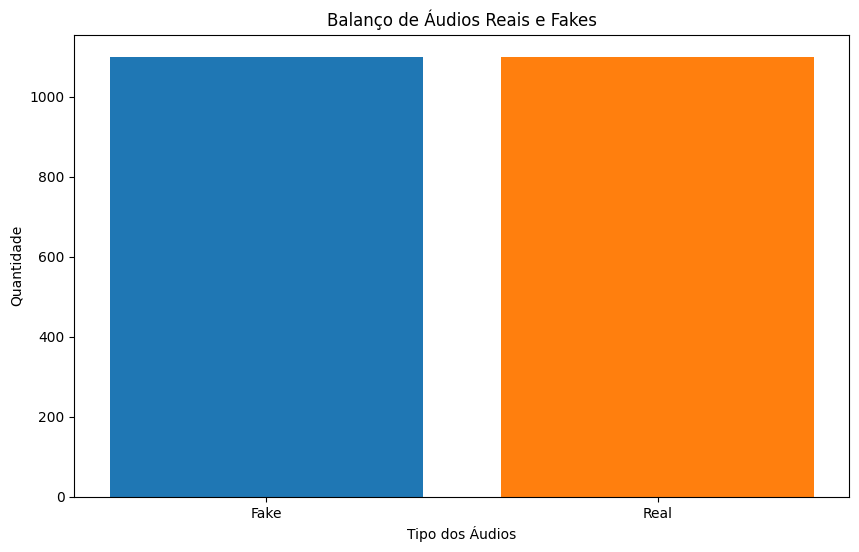

In [28]:
# Contar as ocorrências de cada label
label_counts = [labels_noise_balanced.count(0), labels_noise_balanced.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [29]:
# Separar características (X) e rótulos (y)
X = df_noise_balanced.drop(columns=['label'])
y = df_noise_balanced['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [31]:
# Calculando métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Absoluto Médio (MAE): 0.07
Coeficiente de Determinação (R²): 0.72


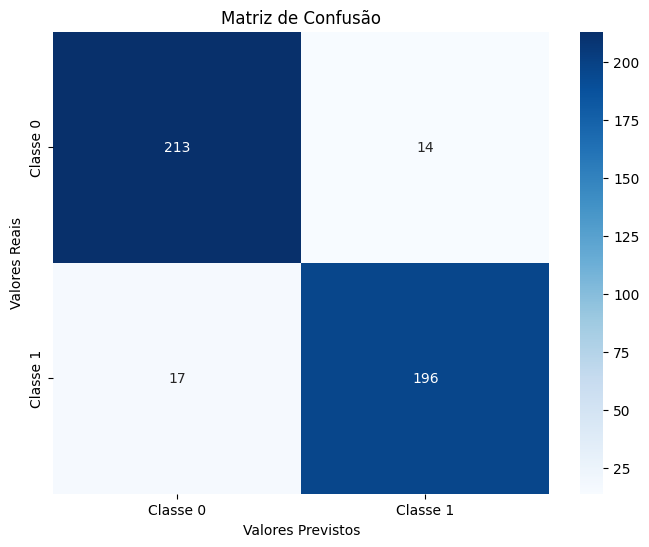

In [32]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [33]:
def random_equalizer(y):
    """Função para aplicar equalização aleatória"""
    # Exemplo simples de equalização aleatória
    # Aqui você pode usar um equalizador real ou simular modificações nos dados do áudio
    gain = np.random.uniform(0.5, 2.0)  # Ganho aleatório entre 0.5 e 2.0
    return y * gain

In [34]:
# Caminho para os dados no Google Drive
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_equalizado'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com equalização aleatória
data_random_equalizer = []  # Dados com equalização aleatória
labels_random_equalizer = []  # Rótulos com equalização aleatória

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer.append(features)
    labels_random_equalizer.append(0)  # Rótulo "fake"

    # Aplicar equalização aleatória
    y_eq = random_equalizer(y)  # Equalização aleatória
    features_eq = np.mean(librosa.feature.mfcc(y=y_eq, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer.append(features_eq)
    labels_random_equalizer.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com equalização aleatória na pasta 'fake' (com sufixo "_eq")
    output_file_path_eq = os.path.join(output_path, 'fake', file_name.replace('.wav', '_eq.wav'))
    sf.write(output_file_path_eq, y_eq, sr)  # Salvando a versão com equalização aleatória

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer.append(features)
    labels_random_equalizer.append(1)  # Rótulo "real"

    # Aplicar equalização aleatória
    y_eq = random_equalizer(y)  # Equalização aleatória
    features_eq = np.mean(librosa.feature.mfcc(y=y_eq, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer.append(features_eq)
    labels_random_equalizer.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com equalização aleatória na pasta 'real' (com sufixo "_eq")
    output_file_path_eq = os.path.join(output_path, 'real', file_name.replace('.wav', '_eq.wav'))
    sf.write(output_file_path_eq, y_eq, sr)  # Salvando a versão com equalização aleatória

In [35]:
# Converter para DataFrame
df_random_equalizer = pd.DataFrame(data_random_equalizer)
df_random_equalizer['label'] = labels_random_equalizer

In [36]:
df_random_equalizer

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
1,-320.823273,85.521347,-18.103909,14.233822,-1.934287,-8.300288,-15.360986,-14.333099,-0.524541,-12.453051,-2.744913,-14.212179,0.993813,0
2,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
3,-270.276123,79.589180,12.035121,21.775890,7.463613,-4.327323,1.702638,5.056441,-11.605011,-8.825641,-12.136455,-8.166678,-7.886452,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,-285.381653,57.043686,3.870186,30.615044,-13.108033,-13.102794,-21.079472,-21.996910,-15.296223,-3.665011,-15.141481,1.185464,-17.169489,1
1600,-301.363037,177.069092,-37.498245,5.008915,8.963133,-2.310470,-10.783433,-15.959943,-5.289495,-14.481618,-3.625240,-2.413878,-10.062649,1
1601,-251.730530,177.069077,-37.498245,5.008915,8.963133,-2.310470,-10.783435,-15.959945,-5.289495,-14.481618,-3.625240,-2.413878,-10.062649,1
1602,-306.485382,68.190407,-10.158875,4.076507,-24.319769,-18.536684,-18.648014,-23.582424,-21.241289,-1.093893,-14.486947,-7.540875,-19.299929,1


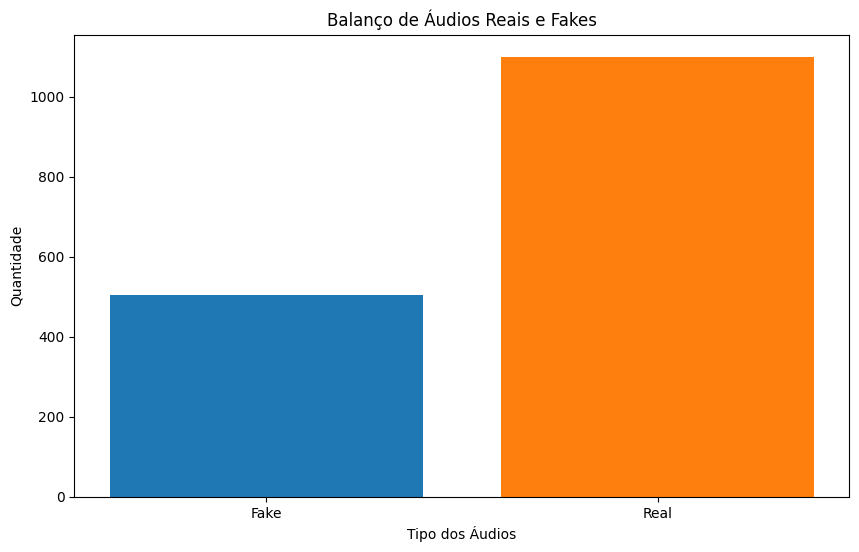

In [37]:
# Contar as ocorrências de cada label
label_counts = [labels_random_equalizer.count(0), labels_random_equalizer.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [38]:
# Separar características (X) e rótulos (y)
X = df_random_equalizer.drop(columns=['label'])
y = df_random_equalizer['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [40]:
# Calculando métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Absoluto Médio (MAE): 0.04
Coeficiente de Determinação (R²): 0.82


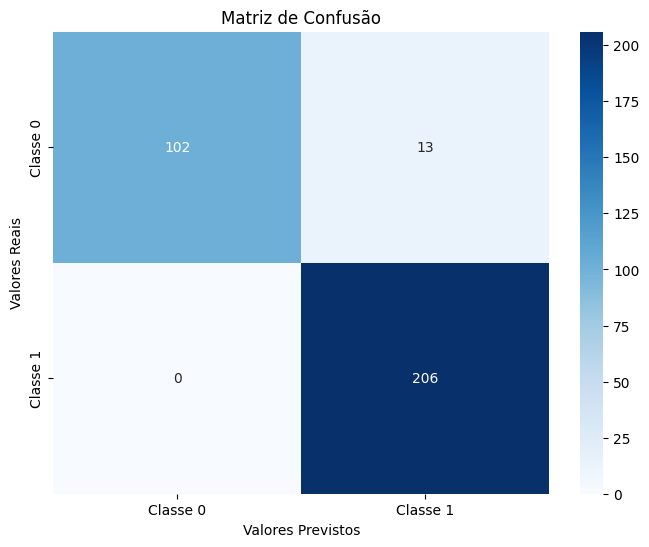

In [41]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [42]:
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_equalizado_balanced'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com equalização aleatória balanceada
data_random_equalizer_balanced = []  # Dados com equalização aleatória balanceada
labels_random_equalizer_balanced = []  # Rótulos com equalização aleatória balanceada

# Função para balancear os dados usando replicação simples
def balance_data(real_files, fake_files):
    """Balanceia os dados replicando aleatoriamente as amostras da classe minoritária."""
    len_real = len(real_files)
    len_fake = len(fake_files)

    # Verificar qual classe tem menos amostras
    if len_real > len_fake:
        # Replicar os arquivos 'fake' até igualar o número
        fake_files += random.choices(fake_files, k=len_real - len_fake)
    elif len_fake > len_real:
        # Replicar os arquivos 'real' até igualar o número
        real_files += random.choices(real_files, k=len_fake - len_real)

    return real_files, fake_files

# Função para aplicar equalização aleatória no áudio
def random_equalizer(y):
    """Aplica equalização aleatória no áudio."""
    # Exemplo de equalização aleatória (ajuste conforme necessário)
    random_factor = random.uniform(0.5, 1.5)
    return y * random_factor

# Obter listas de arquivos reais e fakes
real_files = os.listdir(file_path_real)
fake_files = os.listdir(file_path_fake)

# Balancear os arquivos
real_files, fake_files = balance_data(real_files, fake_files)

# Processar Fake
for file_name in fake_files:
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer_balanced.append(features)
    labels_random_equalizer_balanced.append(0)  # Rótulo "fake"

    # Aplicar equalização aleatória
    y_eq = random_equalizer(y)  # Equalização aleatória
    features_eq = np.mean(librosa.feature.mfcc(y=y_eq, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer_balanced.append(features_eq)
    labels_random_equalizer_balanced.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com equalização aleatória na pasta 'fake' (com sufixo "_eq")
    output_file_path_eq = os.path.join(output_path, 'fake', file_name.replace('.wav', '_eq.wav'))
    sf.write(output_file_path_eq, y_eq, sr)  # Salvando a versão com equalização aleatória

# Processar Real
for file_name in real_files:
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer_balanced.append(features)
    labels_random_equalizer_balanced.append(1)  # Rótulo "real"

    # Aplicar equalização aleatória
    y_eq = random_equalizer(y)  # Equalização aleatória
    features_eq = np.mean(librosa.feature.mfcc(y=y_eq, sr=sr, n_mfcc=13).T, axis=0)
    data_random_equalizer_balanced.append(features_eq)
    labels_random_equalizer_balanced.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com equalização aleatória na pasta 'real' (com sufixo "_eq")
    output_file_path_eq = os.path.join(output_path, 'real', file_name.replace('.wav', '_eq.wav'))
    sf.write(output_file_path_eq, y_eq, sr)  # Salvando a versão com equalização aleatória

In [43]:
# Converter para DataFrame
df_random_equalizer_balanced = pd.DataFrame(data_random_equalizer)
df_random_equalizer_balanced['label'] = labels_random_equalizer

In [44]:
df_random_equalizer_balanced

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
1,-320.823273,85.521347,-18.103909,14.233822,-1.934287,-8.300288,-15.360986,-14.333099,-0.524541,-12.453051,-2.744913,-14.212179,0.993813,0
2,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
3,-270.276123,79.589180,12.035121,21.775890,7.463613,-4.327323,1.702638,5.056441,-11.605011,-8.825641,-12.136455,-8.166678,-7.886452,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,-285.381653,57.043686,3.870186,30.615044,-13.108033,-13.102794,-21.079472,-21.996910,-15.296223,-3.665011,-15.141481,1.185464,-17.169489,1
1600,-301.363037,177.069092,-37.498245,5.008915,8.963133,-2.310470,-10.783433,-15.959943,-5.289495,-14.481618,-3.625240,-2.413878,-10.062649,1
1601,-251.730530,177.069077,-37.498245,5.008915,8.963133,-2.310470,-10.783435,-15.959945,-5.289495,-14.481618,-3.625240,-2.413878,-10.062649,1
1602,-306.485382,68.190407,-10.158875,4.076507,-24.319769,-18.536684,-18.648014,-23.582424,-21.241289,-1.093893,-14.486947,-7.540875,-19.299929,1


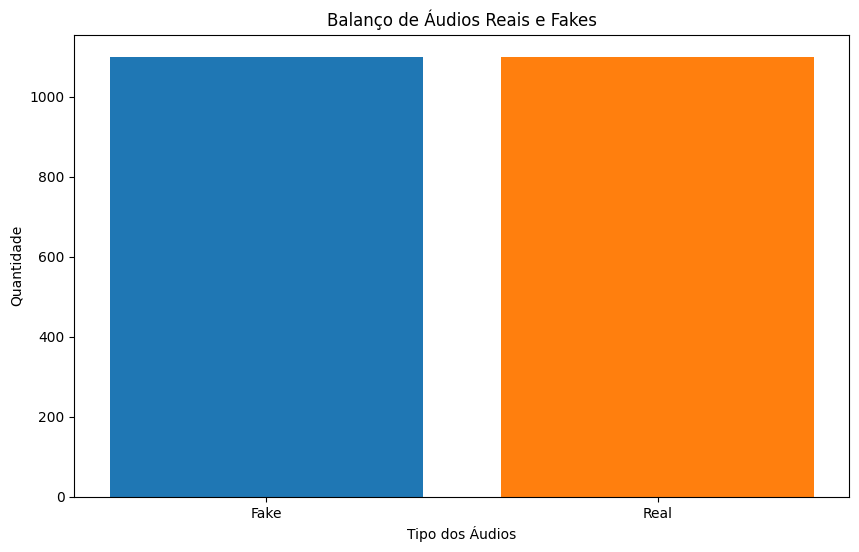

In [45]:
# Contar as ocorrências de cada label
label_counts = [labels_random_equalizer_balanced.count(0), labels_random_equalizer_balanced.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [46]:
# Separar características (X) e rótulos (y)
X = df_random_equalizer_balanced.drop(columns=['label'])
y = df_random_equalizer_balanced['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [48]:
# Calculando métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Absoluto Médio (MAE): 0.04
Coeficiente de Determinação (R²): 0.81


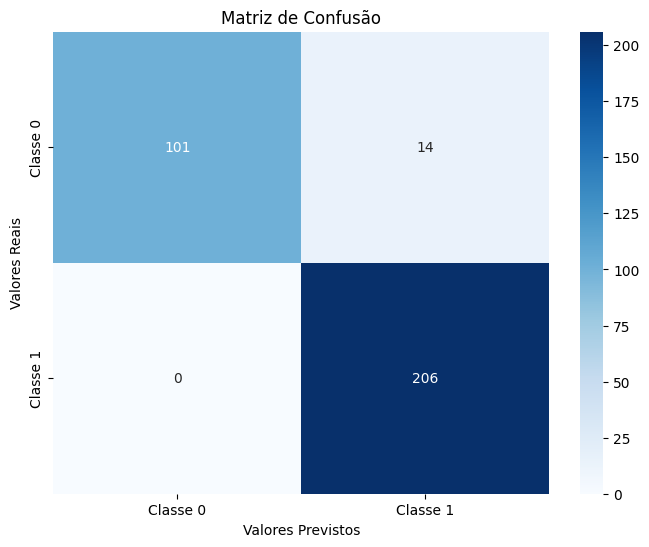

In [49]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [50]:
# Inversão Temporal
def reverse_audio(y):
    return y[::-1]

In [51]:
# Caminho para os dados no Google Drive
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_invertido'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com inversão temporal
data_reverse = []  # Dados com inversão temporal
labels_reverse = []  # Rótulos com inversão temporal

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features)
    labels_reverse.append(0)  # Rótulo "fake"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features_reversed)
    labels_reverse.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'fake' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'fake', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features)
    labels_reverse.append(1)  # Rótulo "real"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features_reversed)
    labels_reverse.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'real' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'real', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

In [52]:
# Converter para DataFrame
df_reverse = pd.DataFrame(data_reverse)
df_reverse['label'] = labels_reverse

In [53]:
df_reverse

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
1,-293.466736,85.523239,-17.968140,14.533060,-1.766421,-8.089673,-15.009739,-14.136434,-0.515667,-12.503580,-2.912647,-14.359088,0.926545,0
2,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
3,-310.286621,79.604019,12.228198,21.525486,7.665128,-4.211032,1.810101,5.094695,-11.634615,-8.634542,-11.995722,-8.216214,-7.915312,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,-309.850708,57.095669,4.195779,30.461248,-13.096855,-12.677743,-21.134619,-21.784662,-15.354177,-3.604936,-15.057524,1.236885,-17.110682,1
1600,-301.363037,177.069092,-37.498245,5.008915,8.963133,-2.310470,-10.783433,-15.959943,-5.289495,-14.481618,-3.625240,-2.413878,-10.062649,1
1601,-301.127655,176.682358,-37.279655,4.869996,9.024131,-2.296411,-10.803740,-15.906434,-5.315583,-14.445990,-3.621054,-2.408631,-10.066648,1
1602,-306.485382,68.190407,-10.158875,4.076507,-24.319769,-18.536684,-18.648014,-23.582424,-21.241289,-1.093893,-14.486947,-7.540875,-19.299929,1


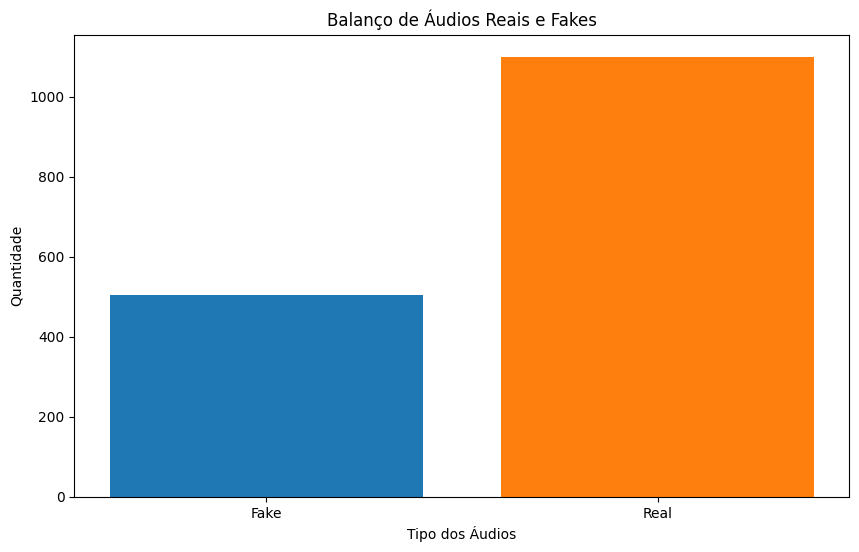

In [54]:
# Contar as ocorrências de cada label
label_counts = [labels_reverse.count(0), labels_reverse.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [55]:
# Separar características (X) e rótulos (y)
X = df_reverse.drop(columns=['label'])
y = df_reverse['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [57]:
# Calculando métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Absoluto Médio (MAE): 0.04
Coeficiente de Determinação (R²): 0.82


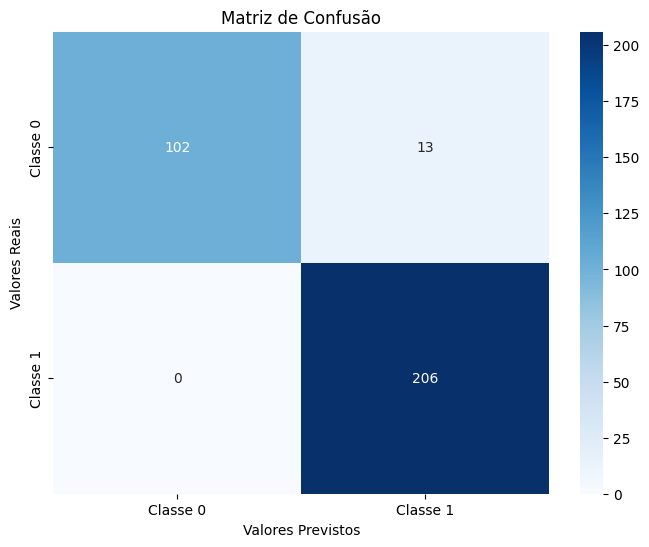

In [58]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [59]:
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_invertido_balanced'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com inversão temporal balanceada
data_reverse_balanced = []  # Dados com inversão temporal balanceada
labels_reverse_balanced = []  # Rótulos com inversão temporal balanceada

# Função para balancear os dados usando replicação simples
def balance_data(real_files, fake_files):
    """Balanceia os dados replicando aleatoriamente as amostras da classe minoritária."""
    len_real = len(real_files)
    len_fake = len(fake_files)

    # Verificar qual classe tem menos amostras
    if len_real > len_fake:
        # Replicar os arquivos 'fake' até igualar o número
        fake_files += random.choices(fake_files, k=len_real - len_fake)
    elif len_fake > len_real:
        # Replicar os arquivos 'real' até igualar o número
        real_files += random.choices(real_files, k=len_fake - len_real)

    return real_files, fake_files

# Obter listas de arquivos reais e fakes
real_files = os.listdir(file_path_real)
fake_files = os.listdir(file_path_fake)

# Balancear os arquivos
real_files, fake_files = balance_data(real_files, fake_files)

# Processar Fake
for file_name in fake_files:
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features)
    labels_reverse_balanced.append(0)  # Rótulo "fake"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features_reversed)
    labels_reverse_balanced.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'fake' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'fake', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

# Processar Real
for file_name in real_files:
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features)
    labels_reverse_balanced.append(1)  # Rótulo "real"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features_reversed)
    labels_reverse_balanced.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'real' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'real', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

In [60]:
# Converter para DataFrame
data_reverse_balanced = pd.DataFrame(data_reverse_balanced)
data_reverse_balanced['label'] = labels_reverse_balanced

In [61]:
data_reverse_balanced

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
1,-293.466736,85.523239,-17.968140,14.533060,-1.766421,-8.089673,-15.009739,-14.136434,-0.515667,-12.503580,-2.912647,-14.359088,0.926545,0
2,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
3,-310.286621,79.604019,12.228198,21.525486,7.665128,-4.211032,1.810101,5.094695,-11.634615,-8.634542,-11.995722,-8.216214,-7.915312,0
4,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,-309.850708,57.095669,4.195779,30.461248,-13.096855,-12.677743,-21.134619,-21.784662,-15.354177,-3.604936,-15.057524,1.236885,-17.110682,1
2196,-301.363037,177.069092,-37.498245,5.008915,8.963133,-2.310470,-10.783433,-15.959943,-5.289495,-14.481618,-3.625240,-2.413878,-10.062649,1
2197,-301.127655,176.682358,-37.279655,4.869996,9.024131,-2.296411,-10.803740,-15.906434,-5.315583,-14.445990,-3.621054,-2.408631,-10.066648,1
2198,-306.485382,68.190407,-10.158875,4.076507,-24.319769,-18.536684,-18.648014,-23.582424,-21.241289,-1.093893,-14.486947,-7.540875,-19.299929,1


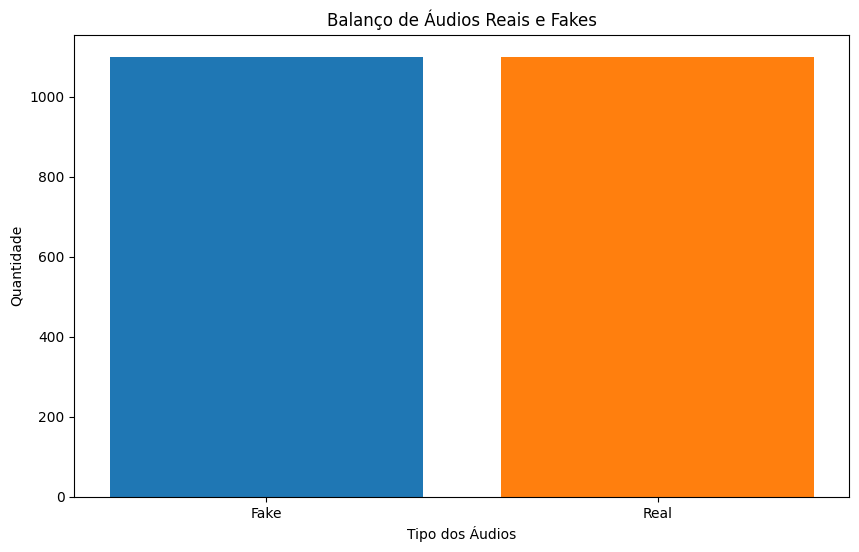

In [62]:
# Contar as ocorrências de cada label
label_counts = [labels_reverse_balanced.count(0), labels_reverse_balanced.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [63]:
# Separar características (X) e rótulos (y)
X = data_reverse_balanced.drop(columns=['label'])
y = data_reverse_balanced['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [65]:
# Calculando métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Absoluto Médio (MAE): 0.01
Coeficiente de Determinação (R²): 0.95


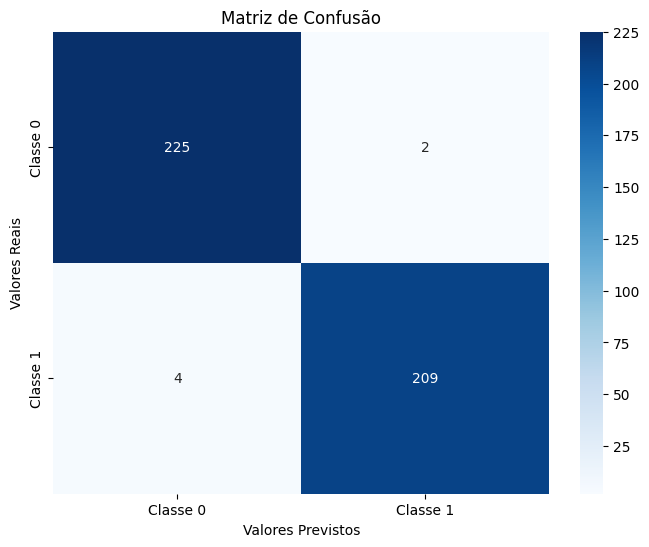

In [66]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()